In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import random
import datetime
import re
from collections import Counter
# from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#stuff from nltk
import nltk
from nltk.tokenize import word_tokenize #<- For finding tokens (small divisions) from a large sample of text
from nltk.corpus import stopwords #<- For calling the know stopwords in english (e.g, articles, connectors)
from nltk.corpus import wordnet #<- For calling a lexical database in eglish with meanings, synonyms, antonyms, and more 
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentAnalyzer

########## progress bar
from tqdm.notebook import tqdm, trange
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import time

sid_analyzer = SentimentIntensityAnalyzer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

##### emotions
import text2emotion as te
from tqdm import tqdm_notebook as tqdm
from nrclex import NRCLex


pd.set_option('display.max_columns', 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
df = pd.read_csv('sentiment_df_crypto_25.csv', parse_dates=['date'] )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795936 entries, 0 to 3795935
Data columns (total 6 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   author                    object        
 1   body                      object        
 2   created_utc               int64         
 3   score                     float64       
 4   date                      datetime64[ns]
 5   Compound Sentiment Score  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 173.8+ MB


In [8]:
df

,author,body,created_utc,score,date,Compound Sentiment Score
0,TechnoMagik,I'm not sure how you eliminate spread.. If I a...,1368332818,1.0,2013-05-12,0.9014
1,mytwobitcents,fixed thanks,1368321753,2.0,2013-05-12,0.4404
2,sex_with_a_goat,"The Spanish one is wrong, we don't use 'y' wit...",1368318717,2.0,2013-05-12,-0.4767
3,davidpbrown,"Yes, Russian Trolls are the most obvious answer.",1368298185,2.0,2013-05-11,0.4019
4,bigglejones,"A ""consultant"" asking advice on how to be a co...",1368257850,2.0,2013-05-11,0.0813
...,...,...,...,...,...,...
4553702,Cold_Goose_4242,I want 75k end of week,1612828909,2.0,2021-02-09,0.0772
4553703,damnusernamegotcutof,Have mercy oh crypto gods for I can only get s...,1612828904,2.0,2021-02-09,0.3612
4553704,larrydavid4eyedfuck,"yes thats correct, I own the ethereum wallet t...",1612828903,1.0,2021-02-09,0.7608
4553705,ChocolateMorsels,"This is insanity. Thank you Elon, very cool!",1612828897,3.0,2021-02-09,0.1742


In [10]:
def get_datetime(df):
    
    """Reddit does not provide a datetime format, comments based on UTC format
    Input = This function takes in Pandas dataframe and expects the presence of a 'created_utc' column
    to convert to Datetime
    
    Output = New column in dataframe called 'datetime' with date present"""

    df['created_utc'] = df['created_utc'].astype(int)
    x = df['created_utc']
    
    datetime = []
    print('creating datetime column')
    for num in tqdm_notebook(x):
        y = pd.Timestamp(num, unit='s')
        datetime.append(y)  
    df['date'] = datetime
    df
    
    return df

# df1 = removed_bots.copy(deep=True)

datetime = get_datetime(df)
# datetime#.info()

creating datetime column


  0%|          | 0/9984839 [00:00<?, ?it/s]

In [55]:
# df = datetime.copy(deep=True)

# df['body'] = df.body.astype(str)

# df['body'] = df['body'].astype('string')


df.info()

emotions = []

for comment in df['body']:
    emotion = NRCLex(comment).affect_frequencies
    emotions.append(emotion)
    
# type(emotions)


df1 = pd.DataFrame(emotions)

df1.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795936 entries, 0 to 3795935
Data columns (total 6 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   author                    object        
 1   body                      object        
 2   created_utc               int64         
 3   score                     float64       
 4   date                      datetime64[ns]
 5   Compound Sentiment Score  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 173.8+ MB


,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,NaN
1,0.086957,0.086957,0.0,0.086957,0.173913,0.130435,0.173913,0.086957,0.043478,0.043478,0.086957
2,0.000000,0.250000,0.0,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,NaN
3,0.111111,0.111111,0.0,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,NaN
5,0.200000,0.133333,0.0,0.066667,0.000000,0.200000,0.200000,0.133333,0.000000,0.066667,NaN
6,0.176471,0.117647,0.0,0.117647,0.058824,0.176471,0.058824,0.117647,0.117647,0.058824,NaN
7,0.034483,0.103448,0.0,0.172414,0.103448,0.172414,0.068966,0.068966,0.034483,0.137931,0.103448
8,0.187500,0.250000,0.0,0.000000,0.062500,0.062500,0.250000,0.000000,0.062500,0.062500,0.062500
9,0.333333,0.222222,0.0,0.111111,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,NaN


In [56]:
# df_full = pd.concat([df, df1], axis=1, join='outer')
df_full.fillna(value=0)

MemoryError: Unable to allocate 452. MiB for an array with shape (13, 4553707) and data type float64

In [ ]:
joy = df_full.groupby([pd.Grouper(key='date',freq='D')])['joy'].mean()
sadness = df_full.groupby([pd.Grouper(key='date',freq='D')])['sadness'].mean()
surprise = df_full.groupby([pd.Grouper(key='date',freq='D')])['surprise'].mean()
anger = df_full.groupby([pd.Grouper(key='date',freq='D')])['anger'].mean()
fear = df_full.groupby([pd.Grouper(key='date',freq='D')])['fear'].mean()
anticipation = df_full.groupby([pd.Grouper(key='date',freq='D')])['anticipation'].mean()
trust = df_full.groupby([pd.Grouper(key='date',freq='D')])['trust'].mean()
disgust = df_full.groupby([pd.Grouper(key='date',freq='D')])['disgust'].mean()
typejoy

In [50]:
emo =[fear,anger,trust,surprise,sadness,disgust,joy,anticipation]
emo_df = pd.concat(emo, axis=1)
emo_final = emo_df[49:].copy(deep=True)
emo_final = emo_final.reset_index()
emo_final

,date,fear,anger,trust,surprise,sadness,disgust,joy,anticipation
0,2013-04-29,0.048086,0.048086,0.096639,0.171335,0.051821,0.000000,0.048086,0.170915
1,2013-04-30,0.041810,0.078592,0.240719,0.043755,0.040266,0.036343,0.053962,0.148772
2,2013-05-01,0.063889,0.050000,0.044444,0.077778,0.088889,0.000000,0.027778,0.338889
3,2013-05-02,0.056920,0.031250,0.184896,0.010417,0.038690,0.028274,0.065848,0.132440
4,2013-05-03,0.050055,0.097674,0.136915,0.026799,0.026387,0.067199,0.071867,0.118777
...,...,...,...,...,...,...,...,...,...
2844,2021-02-10,0.043702,0.041018,0.107790,0.038694,0.039714,0.021299,0.055704,0.247382
2845,2021-02-11,0.040635,0.038408,0.110911,0.037618,0.038678,0.019315,0.056249,0.254287
2846,2021-02-12,0.042652,0.042711,0.107174,0.039677,0.040347,0.020743,0.056566,0.255251
2847,2021-02-13,0.043687,0.040240,0.101835,0.037991,0.041825,0.023127,0.054274,0.249835


,Compound Sentiment Score,sentiment change,date,High,Low,Open,Close,Volume,Marketcap,Volatility,date,fear,anger,trust,surprise,sadness,disgust,joy,anticipation
0,0.45880,-0.10970,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,10.065677,2013-04-29,0.048086,0.048086,0.096639,0.171335,0.051821,0.000000,0.048086,0.170915
1,0.74420,0.28540,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,9.608347,2013-04-30,0.041810,0.078592,0.240719,0.043755,0.040266,0.036343,0.053962,0.148772
2,0.45625,-0.28795,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,29.864461,2013-05-01,0.063889,0.050000,0.044444,0.077778,0.088889,0.000000,0.027778,0.338889
3,0.69350,0.23725,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,36.104697,2013-05-02,0.056920,0.031250,0.184896,0.010417,0.038690,0.028274,0.065848,0.132440
4,0.62490,-0.06860,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,36.697851,2013-05-03,0.050055,0.097674,0.136915,0.026799,0.026387,0.067199,0.071867,0.118777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,0.40190,0.00000,2021-02-10,47145.568199,43881.152599,46469.761202,44918.184492,8.730109e+10,8.366169e+11,7.439220,2021-02-10,0.043702,0.041018,0.107790,0.038694,0.039714,0.021299,0.055704,0.247382
2845,0.41990,0.01800,2021-02-11,48463.467125,44187.762351,44898.711611,47909.331195,8.138891e+10,8.923649e+11,9.676219,2021-02-11,0.040635,0.038408,0.110911,0.037618,0.038678,0.019315,0.056249,0.254287
2846,0.40190,-0.01800,2021-02-12,48745.733800,46424.977818,47877.034375,47504.851183,7.655504e+10,8.848741e+11,4.998938,2021-02-12,0.042652,0.042711,0.107174,0.039677,0.040347,0.020743,0.056566,0.255251
2847,0.38180,-0.02010,2021-02-13,48047.744591,46392.282333,47491.202555,47105.517473,7.025046e+10,8.774789e+11,3.568400,2021-02-13,0.043687,0.040240,0.101835,0.037991,0.041825,0.023127,0.054274,0.249835


In [46]:
df_sent = pd.read_csv('sent_price_numerical.csv')
df_sent

,Compound Sentiment Score,sentiment change,date,High,Low,Open,Close,Volume,Marketcap,Volatility
0,0.45880,-0.10970,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,10.065677
1,0.74420,0.28540,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,9.608347
2,0.45625,-0.28795,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,29.864461
3,0.69350,0.23725,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,36.104697
4,0.62490,-0.06860,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,36.697851
...,...,...,...,...,...,...,...,...,...,...
2844,0.40190,0.00000,2021-02-10,47145.568199,43881.152599,46469.761202,44918.184492,8.730109e+10,8.366169e+11,7.439220
2845,0.41990,0.01800,2021-02-11,48463.467125,44187.762351,44898.711611,47909.331195,8.138891e+10,8.923649e+11,9.676219
2846,0.40190,-0.01800,2021-02-12,48745.733800,46424.977818,47877.034375,47504.851183,7.655504e+10,8.848741e+11,4.998938
2847,0.38180,-0.02010,2021-02-13,48047.744591,46392.282333,47491.202555,47105.517473,7.025046e+10,8.774789e+11,3.568400


In [52]:
result = pd.concat([df_sent, emo_final], axis=1, join='inner')
result

,Compound Sentiment Score,sentiment change,date,High,Low,Open,Close,Volume,Marketcap,Volatility,date,fear,anger,trust,surprise,sadness,disgust,joy,anticipation
0,0.45880,-0.10970,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,10.065677,2013-04-29,0.048086,0.048086,0.096639,0.171335,0.051821,0.000000,0.048086,0.170915
1,0.74420,0.28540,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,9.608347,2013-04-30,0.041810,0.078592,0.240719,0.043755,0.040266,0.036343,0.053962,0.148772
2,0.45625,-0.28795,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,29.864461,2013-05-01,0.063889,0.050000,0.044444,0.077778,0.088889,0.000000,0.027778,0.338889
3,0.69350,0.23725,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,36.104697,2013-05-02,0.056920,0.031250,0.184896,0.010417,0.038690,0.028274,0.065848,0.132440
4,0.62490,-0.06860,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,36.697851,2013-05-03,0.050055,0.097674,0.136915,0.026799,0.026387,0.067199,0.071867,0.118777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,0.40190,0.00000,2021-02-10,47145.568199,43881.152599,46469.761202,44918.184492,8.730109e+10,8.366169e+11,7.439220,2021-02-10,0.043702,0.041018,0.107790,0.038694,0.039714,0.021299,0.055704,0.247382
2845,0.41990,0.01800,2021-02-11,48463.467125,44187.762351,44898.711611,47909.331195,8.138891e+10,8.923649e+11,9.676219,2021-02-11,0.040635,0.038408,0.110911,0.037618,0.038678,0.019315,0.056249,0.254287
2846,0.40190,-0.01800,2021-02-12,48745.733800,46424.977818,47877.034375,47504.851183,7.655504e+10,8.848741e+11,4.998938,2021-02-12,0.042652,0.042711,0.107174,0.039677,0.040347,0.020743,0.056566,0.255251
2847,0.38180,-0.02010,2021-02-13,48047.744591,46392.282333,47491.202555,47105.517473,7.025046e+10,8.774789e+11,3.568400,2021-02-13,0.043687,0.040240,0.101835,0.037991,0.041825,0.023127,0.054274,0.249835


In [53]:
result.to_csv('Sent_emotion_price_vader_original.csv', header=True, index=False, columns=list(result.axes[1]))

In [22]:
df1
happy_bitcoin = df_full.groupby([pd.Grouper(key='date',freq='D')])['happy'].mean()
sad_bitcoin = df_full.groupby([pd.Grouper(key='date',freq='D')])['sadness'].mean()
surprise_bitcoin = df_full.groupby([pd.Grouper(key='date',freq='D')])['surprise'].mean()
angry_bitcoin = df_full.groupby([pd.Grouper(key='date',freq='D')])['angry'].mean()
fear_bitcoin = df_full.groupby([pd.Grouper(key='date',freq='D')])['fear'].mean()


,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0.000000,0.000000,0.0,0.500000,0.0,0.25,0.000000,0.000000,0.000000,0.0,0.25
1,0.000000,0.000000,0.0,1.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,NaN
2,0.000000,0.333333,0.0,0.000000,0.0,0.00,0.666667,0.000000,0.000000,0.0,NaN
3,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,NaN
4,0.000000,0.000000,0.0,0.500000,0.0,0.50,0.000000,0.000000,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9984834,0.000000,0.000000,0.0,0.500000,0.0,0.50,0.000000,0.000000,0.000000,0.0,NaN
9984835,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,NaN
9984836,0.166667,0.166667,0.0,0.166667,0.0,0.00,0.166667,0.166667,0.166667,0.0,NaN
9984837,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.0,NaN


In [7]:
df = datetime.copy(deep=True)
df.info()

df_count = datetime.groupby([pd.Grouper(key='date',freq='D')]).count()
df_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10094414 entries, 0 to 10094413
Data columns (total 6 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   author                    object        
 1   body                      object        
 2   created_utc               int32         
 3   score                     float64       
 4   date                      datetime64[ns]
 5   Compound Sentiment Score  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 423.6+ MB


,author,body,created_utc,score,Compound Sentiment Score
date,,,,,
2013-03-11,2,2,2,2,2
2013-03-12,31,31,31,31,31
2013-03-13,28,28,28,28,28
2013-03-14,8,8,8,8,8
2013-03-15,10,10,10,10,10
...,...,...,...,...,...
2021-05-27,42189,42114,42189,42189,42189
2021-05-28,42034,41951,42034,42034,42034
2021-05-29,40376,40316,40376,40376,40376


In [8]:
pd.set_option('display.max_rows', 3004)

df_count

,author,body,created_utc,score,Compound Sentiment Score
date,,,,,
2013-03-11,2,2,2,2,2
2013-03-12,31,31,31,31,31
2013-03-13,28,28,28,28,28
2013-03-14,8,8,8,8,8
2013-03-15,10,10,10,10,10
2013-03-16,8,8,8,8,8
2013-03-17,5,5,5,5,5
2013-03-18,2,2,2,2,2
2013-03-19,6,6,6,6,6


### Making positive sentiment dataframe

In [9]:
# df['Positive Compound'] = df['Compound Sentiment Score'] >= 0.05
# df['Negative Compound'] = df['Compound Sentiment Score'] <= -0.05
# df

df_positive = df.copy(deep=True)
df_negative = df.copy(deep=True)

df_positive_drop = df_positive[df_positive['Compound Sentiment Score'] <= 0.05].index
# df_positive_drop

df_clean_pos = df_positive.drop(index = df_positive_drop)
df_clean_pos

,author,body,created_utc,score,date,Compound Sentiment Score
0,TechnoMagik,I'm not sure how you eliminate spread.. If I a...,1368332818,1.0,2013-05-12 04:26:58,0.9014
1,mytwobitcents,fixed thanks,1368321753,2.0,2013-05-12 01:22:33,0.4404
4,davidpbrown,"Yes, Russian Trolls are the most obvious answer.",1368298185,2.0,2013-05-11 18:49:45,0.4019
5,bigglejones,"A ""consultant"" asking advice on how to be a co...",1368257850,2.0,2013-05-11 07:37:30,0.0813
8,Xandie6,Btc-e.com trades high volumes in many popular ...,1368250990,1.0,2013-05-11 05:43:10,0.5994
...,...,...,...,...,...,...
10094402,sethinak76,Yep. I didn't sell then and wont now,1621788193,2.0,2021-05-23 16:43:13,0.2960
10094404,StupidQuestionsAgain,But the one at the bakery is more useful,1621788190,2.0,2021-05-23 16:43:10,0.6474
10094406,youtink,"yeah same here I don't sell but I do stake it,...",1621788190,1.0,2021-05-23 16:43:10,0.6640
10094410,Ajelandrus,HAHA exactly me hahaha,1621788188,1.0,2021-05-23 16:43:08,0.8091


### Making negative sentiment dataframe

In [11]:
df_negative_drop = df_negative[df_negative['Compound Sentiment Score'] >= -0.05].index
df_negative
df_clean_neg = df_negative.drop(index = df_negative_drop)
# df_positive
df_clean_neg

,author,body,created_utc,score,date,Compound Sentiment Score
2,sex_with_a_goat,"The Spanish one is wrong, we don't use 'y' wit...",1368318717,2.0,2013-05-12 00:31:57,-0.4767
6,davidpbrown,Websites get hacked.. news at 11.\n\nDon't kee...,1368255591,3.0,2013-05-11 06:59:51,-0.4019
7,davidpbrown,20% not in cold storage = ?a sizeable amount o...,1368255514,1.0,2013-05-11 06:58:34,-0.1779
9,sgodsdogs,it seems there's been a lot of talking heads i...,1368249064,5.0,2013-05-11 05:11:04,-0.5574
12,Tencoin1,"I don't understand, what chance?. The end of t...",1368235203,1.0,2013-05-11 01:20:03,-0.1877
...,...,...,...,...,...,...
10094399,Benderineurope,"Yikes, do you think ether can get that low?",1621788195,2.0,2021-05-23 16:43:15,-0.2732
10094403,TRexShrimpboi,Brutal,1621788191,1.0,2021-05-23 16:43:11,-0.6249
10094407,seethingslug,Because it’s a worthless commodity people are ...,1621788189,3.0,2021-05-23 16:43:09,-0.4404
10094408,ShanktarDonetsk,We're all strange down here,1621788189,5.0,2021-05-23 16:43:09,-0.2023


In [37]:
batch = df_clean_neg.tail(1000000)
batch.sort_values(by='date')
mini = batch.sample(frac=0.10)
stats = mini.groupby([pd.Grouper(key='date',freq='D')]).count()
stats.tail(55)
mini

# mini

,author,body,created_utc,score,date,Compound Sentiment Score
6298245,ArtyHobo,SUCK ON THAT ZUCK\nC'MON BABY\nLICK MY LIBRA,1612848153,1.0,2021-02-09 05:22:33,-0.4404
8196543,ffoott,"Is there anything stopping us, really?",1619618763,1.0,2021-04-28 14:06:03,-0.1531
8855897,Success-Relative,"Yea I agree, and the only way to really get mo...",1620506827,3.0,2021-05-08 20:47:07,-0.3612
8049922,That_Guy_Red,"Idk if that's the move, chief.",1619608868,2.0,2021-04-28 11:21:08,-0.1027
7255362,Seg0sa,"I don't hate them, but their 10 day fund lock ...",1617854736,1.0,2021-04-08 04:05:36,-0.2025
...,...,...,...,...,...,...
8615020,ObsoleteGentile,Nope. They didn’t. Everything I’ve said is tru...,1620130036,0.0,2021-05-04 12:07:16,-0.4939
6846570,TheKyleShow,RIP. \n\nSomehow the price won’t be affected.,1615240731,0.0,2021-03-08 21:58:51,-0.1531
5793736,Febos,"Dunt worry man, Ripple will bail out bankers. ...",1607370721,0.0,2020-12-07 19:52:01,-0.1759
8528539,papasquat2021,It would appear you all want to fuck your coin...,1620260376,2.0,2021-05-06 00:19:36,-0.6808


In [38]:
emotions = []
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for text in tqdm(mini.body):
    emotions.append(te.get_emotion(str(text)))
    


<ipython-input-38-4be304bc37be>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

<ipython-input-38-4be304bc37be>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for text in tqdm(mini.body):


  0%|          | 0/100000 [00:00<?, ?it/s]

In [39]:
data = mini.copy()

emotion_data = pd.DataFrame.from_dict(emotions)

# datas = pd.DataFrame()

happy = emotion_data.Happy
angry = emotion_data.Angry
surprise = emotion_data.Surprise
sad = emotion_data.Sad
fear = emotion_data.Fear

# datas['happy']

happy = happy.values
angry = angry.values
surprise = surprise.values
sad = sad.values
fear = fear.values

#insering into mini-dataframe

data.insert(loc=1, column='happy', value=happy)
data.insert(loc=1, column='angry', value=angry)
data.insert(loc=1, column='surprise', value=surprise)
data.insert(loc=1, column='sad', value=sad)
data.insert(loc=1, column='fear', value=fear)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 6298245 to 8270954
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   author                    100000 non-null  object        
 1   fear                      100000 non-null  float64       
 2   sad                       100000 non-null  float64       
 3   surprise                  100000 non-null  float64       
 4   angry                     100000 non-null  float64       
 5   happy                     100000 non-null  float64       
 6   body                      100000 non-null  object        
 7   created_utc               100000 non-null  int32         
 8   score                     100000 non-null  float64       
 9   date                      100000 non-null  datetime64[ns]
 10  Compound Sentiment Score  100000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(1), object(2)
memo

In [40]:
happy_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['happy'].mean()
sad_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['sad'].mean()
surprise_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['surprise'].mean()
angry_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['angry'].mean()
fear_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['fear'].mean()

fear_bitcoin

date
2020-09-30    0.300000
2020-10-01    0.324796
2020-10-02    0.340723
2020-10-03    0.331064
2020-10-04    0.322031
2020-10-05    0.317976
2020-10-06    0.338588
2020-10-07    0.298730
2020-10-08    0.298478
2020-10-09    0.307763
2020-10-10    0.324348
2020-10-11    0.368772
2020-10-12    0.337857
2020-10-13    0.334000
2020-10-14    0.381947
2020-10-15    0.267627
2020-10-16    0.259670
2020-10-17    0.247727
2020-10-18    0.306923
2020-10-19    0.283607
2020-10-20    0.287590
2020-10-21    0.282950
2020-10-22    0.306857
2020-10-23    0.298729
2020-10-24    0.331979
2020-10-25    0.337215
2020-10-26    0.351860
2020-10-27    0.320551
2020-10-28    0.265636
2020-10-29    0.329655
2020-10-30    0.346197
2020-10-31    0.320968
2020-11-01    0.375000
2020-11-02    0.289485
2020-11-03    0.310741
2020-11-04    0.368276
2020-11-05         NaN
2020-11-06    0.334324
2020-11-07    0.329369
2020-11-08    0.299604
2020-11-09    0.317907
2020-11-10    0.307434
2020-11-11    0.395114
2020-1

In [41]:
# stats = data.groupby([pd.Grouper(key='date',freq='D')]).count()
# stats.tail(55)
data.to_csv('emotions_negative.csv', header=True, index=False, columns=list(data.axes[1]))

In [1]:
# for i in range(0, len(fear_bitcoin)):
#     print(fear_bitcoin[i])


plt.figure(figsize=(15,9))


# plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
# plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
# plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')
plt.plot(range(0,len(happy_bitcoin),1), happy_bitcoin, c='m', label = 'happy')
plt.plot(range(0,len(angry_bitcoin),1), angry_bitcoin, c='k', label = 'angry')
plt.plot(range(0,len(sad_bitcoin),1), sad_bitcoin, c='y', label = 'sad')
plt.plot(range(0,len(surprise_bitcoin),1), surprise_bitcoin, c='blue', label = 'surprise')
plt.plot(range(0,len(fear_bitcoin),1), fear_bitcoin, c='limegreen', label = 'fear')



#lag shown between price and sentiment by shading
# plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.3)


# plt.axvline(x=30, label = 'November period')
# plt.axvline(x=0)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()

NameError: name 'plt' is not defined

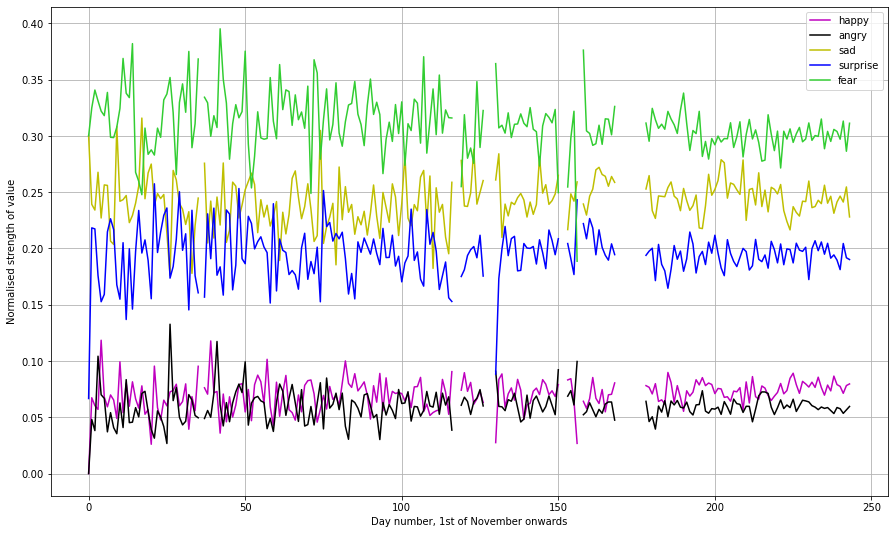

In [43]:
plt.figure(figsize=(15,9))


# plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
# plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
# plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')
plt.plot(range(0,len(happy_bitcoin),1), happy_bitcoin, c='m', label = 'happy')
plt.plot(range(0,len(angry_bitcoin),1), angry_bitcoin, c='k', label = 'angry')
plt.plot(range(0,len(sad_bitcoin),1), sad_bitcoin, c='y', label = 'sad')
plt.plot(range(0,len(surprise_bitcoin),1), surprise_bitcoin, c='blue', label = 'surprise')
plt.plot(range(0,len(fear_bitcoin),1), fear_bitcoin, c='limegreen', label = 'fear')



#lag shown between price and sentiment by shading
# plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.3)


# plt.axvline(x=30, label = 'November period')
# plt.axvline(x=0)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()

In [29]:
data

,author,fear,sad,surprise,angry,happy,body,created_utc,score,date,Compound Sentiment Score
2897560,99NewPairsOfShoes,0.00,1.00,0.00,0.00,0.00,"I completely agree, the validation process is ...",1527090970,-1.0,2018-05-23 15:56:10,-0.6378
4871965,Drogon__,0.29,0.29,0.14,0.00,0.29,Tether artificially pumping the market a few w...,1589088571,4.0,2020-05-10 05:29:31,-0.7003
152061,decentralizesharing,0.00,1.00,0.00,0.00,0.00,I believe ethtrader is brigading this subreddi...,1497136489,4.0,2017-06-10 23:14:49,-0.3612
2634353,twinbee,0.33,0.25,0.33,0.08,0.00,I just look at the results and see Bitcoin's r...,1524861449,3.0,2018-04-27 20:37:29,-0.9651
4901727,Khrimz000,0.45,0.14,0.21,0.10,0.10,If the power goes out then the world is fucked...,1588779877,1.0,2020-05-06 15:44:37,-0.9767
9920254,bookmarks47,0.50,0.50,0.00,0.00,0.00,What’s crazy is that you held in 2017 and only...,1622244483,1.0,2021-05-28 23:28:03,-0.3400
7560873,Delta27-,1.00,0.00,0.00,0.00,0.00,No your kharma already account for that in the...,1619070330,1.0,2021-04-22 05:45:30,-0.2960
1447947,RemindMeBot,0.33,0.11,0.22,0.22,0.11,I will be messaging you on [**2019-01-19 18:13...,1516471998,1.0,2018-01-20 18:13:18,-0.5283
4553252,GenericOfficeMan,0.43,0.14,0.29,0.00,0.14,Without limited liability who is going to star...,1568709463,1.0,2019-09-17 08:37:43,-0.5693
7813778,PM_ME_MONERO_PLZ,0.00,0.00,1.00,0.00,0.00,"damn, I think you just figured out Dogecoin’s ...",1619049031,5.0,2021-04-21 23:50:31,-0.4019


In [30]:
d = data.sample(n=200)
d_p = pd.DataFrame.progress_apply(d['body'], lambda x: te.get_emotion(str(x)))
d_p
# lambda x: get_sentiment(x,sid_analyzer,'compound')

  0%|          | 0/200 [00:00<?, ?it/s]

8116898    {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.25,...
8494151    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
9229894    {'Happy': 0.0, 'Angry': 0.17, 'Surprise': 0.0,...
9357128    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
910170     {'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...
1660844    {'Happy': 0.09, 'Angry': 0.0, 'Surprise': 0.45...
5320133    {'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.08...
580311     {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
4828013    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...
7263652    {'Happy': 0.0, 'Angry': 0.4, 'Surprise': 0.2, ...
5106791    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.4, ...
3825682    {'Happy': 0.2, 'Angry': 0.0, 'Surprise': 0.0, ...
7006044    {'Happy': 0.13, 'Angry': 0.0, 'Surprise': 0.27...
5451418    {'Happy': 0.0, 'Angry': 0.5, 'Surprise': 0.0, ...
5045186    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.67,...
8053343    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
1413006    {'Happy': 0.0

In [31]:
# data = data.sort_values(by='date')

In [50]:
# a = data[500:800]
# a.tail(50)

In [10]:
batch_pos = df_clean_pos.tail(2000000)
batch_pos.sort_values(by='date')
mini = batch_pos.sample(frac=0.05)
stats = mini.groupby([pd.Grouper(key='date',freq='D')]).count()
stats.tail(55)
mini

,author,body,created_utc,score,date,Compound Sentiment Score
5846197,T_Blaze,Take some profits now before the whales do.,1609915119,1.0,2021-01-06 06:38:39,0.4404
8830311,NDB05_,Gotta work on the profit tho,1620906108,1.0,2021-05-13 11:41:48,0.4404
7699801,L4993Rz,Crazy how this got so inflated. And I still do...,1618809684,1.0,2021-04-19 05:21:24,0.5579
8433100,iGotItNowRobbie,Harmony ONE seems like it is just getting star...,1620229486,1.0,2021-05-05 15:44:46,0.7311
9893025,PurpSSB,This is true,1622208235,1.0,2021-05-28 13:23:55,0.4215
...,...,...,...,...,...,...
7513008,JRsmithThaGoat,Link gang is strong hodlers,1618885583,2.0,2021-04-20 02:26:23,0.5106
7014603,Rinmusya,Always stay one step ahead. Lol,1617202513,1.0,2021-03-31 14:55:13,0.4215
9032998,trixyd,"It's normal to be nervous on your wedding day,...",1620806317,2.0,2021-05-12 07:58:37,0.8481
6435888,Stunning_Ordinary548,You are focused on market cap versus a working...,1613799815,1.0,2021-02-20 05:43:35,0.8750


In [11]:
emotions = []
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for text in tqdm(mini.body):
    emotions.append(te.get_emotion(str(text)))
    


<ipython-input-11-4be304bc37be>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

<ipython-input-11-4be304bc37be>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for text in tqdm(mini.body):


  0%|          | 0/100000 [00:00<?, ?it/s]

In [17]:
emotions

emotion_data = pd.DataFrame.from_dict(emotions)
emotion_data


,Happy,Angry,Surprise,Sad,Fear
0,0.00,0.0,0.00,0.00,1.00
1,0.00,0.0,0.00,0.00,1.00
2,0.12,0.0,0.12,0.12,0.62
3,0.00,0.0,0.00,0.50,0.50
4,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...
99995,1.00,0.0,0.00,0.00,0.00
99996,0.00,0.5,0.00,0.50,0.00
99997,0.40,0.0,0.20,0.00,0.40
99998,0.00,0.0,0.15,0.08,0.77


In [12]:
data = mini.copy()

emotion_data = pd.DataFrame.from_dict(emotions)

# datas = pd.DataFrame()

happy = emotion_data.Happy
angry = emotion_data.Angry
surprise = emotion_data.Surprise
sad = emotion_data.Sad
fear = emotion_data.Fear

# datas['happy']

happy = happy.values
angry = angry.values
surprise = surprise.values
sad = sad.values
fear = fear.values

#insering into mini-dataframe

data.insert(loc=1, column='happy', value=happy)
data.insert(loc=1, column='angry', value=angry)
data.insert(loc=1, column='surprise', value=surprise)
data.insert(loc=1, column='sad', value=sad)
data.insert(loc=1, column='fear', value=fear)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5846197 to 6622165
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   author                    100000 non-null  object        
 1   fear                      100000 non-null  float64       
 2   sad                       100000 non-null  float64       
 3   surprise                  100000 non-null  float64       
 4   angry                     100000 non-null  float64       
 5   happy                     100000 non-null  float64       
 6   body                      100000 non-null  object        
 7   created_utc               100000 non-null  int32         
 8   score                     100000 non-null  float64       
 9   date                      100000 non-null  datetime64[ns]
 10  Compound Sentiment Score  100000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(1), object(2)
memo

In [13]:
happy_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['happy'].mean()
sad_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['sad'].mean()
surprise_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['surprise'].mean()
angry_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['angry'].mean()
fear_bitcoin = data.groupby([pd.Grouper(key='date',freq='D')])['fear'].mean()

fear_bitcoin

date
2021-01-01    0.416429
2021-01-02    0.379155
2021-01-03    0.263950
2021-01-04    0.306259
2021-01-05    0.321745
2021-01-06    0.336042
2021-01-07    0.265887
2021-01-08    0.307219
2021-01-09    0.275556
2021-01-10    0.268844
2021-01-11    0.290731
2021-01-12    0.314510
2021-01-13    0.294410
2021-01-14    0.308261
2021-01-15    0.329043
2021-01-16    0.303548
2021-01-17    0.244877
2021-01-18    0.291674
2021-01-19    0.303525
2021-01-20    0.301946
2021-01-21    0.300397
2021-01-22    0.336359
2021-01-23    0.293006
2021-01-24    0.271951
2021-01-25         NaN
2021-01-26         NaN
2021-01-27    0.250603
2021-01-28    0.316302
2021-01-29    0.273284
2021-01-30    0.262971
2021-01-31    0.277133
2021-02-01    0.318806
2021-02-02    0.295324
2021-02-03    0.303063
2021-02-04         NaN
2021-02-05         NaN
2021-02-06         NaN
2021-02-07    0.195909
2021-02-08    0.280532
2021-02-09    0.308352
2021-02-10    0.298028
2021-02-11    0.298426
2021-02-12    0.321128
2021-0

In [14]:
data.to_csv('emotions_positive.csv', header=True, index=False, columns=list(data.axes[1]))

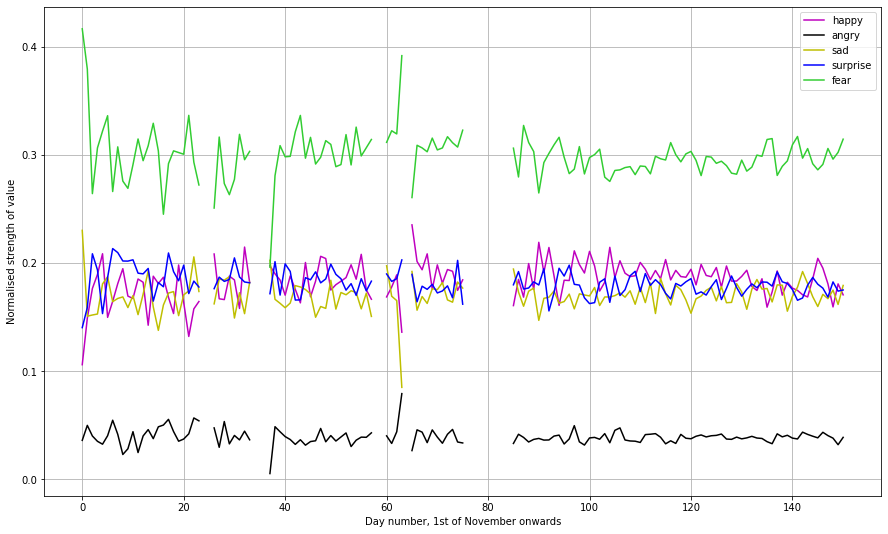

In [15]:
plt.figure(figsize=(15,9))


# plt.plot(range(0,len(normalised_price_list),1), norm_comp_list, c='red', label='Compound sentiment')
# plt.plot(range(0,len(normalised_price_list),1), norm_pos_list, c='orange')
# plt.plot(range(0,len(normalised_price_list),1), norm_neg_list, c='blue')
# plt.plot(range(0,len(normalised_price_list),1), normalised_price_list, c='green', label = 'Normalised price')
# plt.plot(range(0,len(compound_sentiment_sum_bitcoin_list),1), compound_sentiment_sum_bitcoin_list, c='purple', label = 'Bitcoin sentiment')
plt.plot(range(0,len(happy_bitcoin),1), happy_bitcoin, c='m', label = 'happy')
plt.plot(range(0,len(angry_bitcoin),1), angry_bitcoin, c='k', label = 'angry')
plt.plot(range(0,len(sad_bitcoin),1), sad_bitcoin, c='y', label = 'sad')
plt.plot(range(0,len(surprise_bitcoin),1), surprise_bitcoin, c='blue', label = 'surprise')
plt.plot(range(0,len(fear_bitcoin),1), fear_bitcoin, c='limegreen', label = 'fear')



#lag shown between price and sentiment by shading
# plt.fill_between(range(0,len(normalised_price_list),1),normalised_price_list, compound_sentiment_sum_bitcoin_list, color='tab:gray', alpha=0.3)


# plt.axvline(x=30, label = 'November period')
# plt.axvline(x=0)

# plt.vlines(x=35, colors='blue', linestyles='solid', label='', *, data=None, **kwargs)

plt.xlabel('Day number, 1st of November onwards')
plt.ylabel('Normalised strength of value')


plt.grid()
plt.legend()  
plt.show()